In [1]:
import cv2

In [2]:
image = cv2.imread("demo-image.jpg")

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
import matplotlib.pyplot as plt

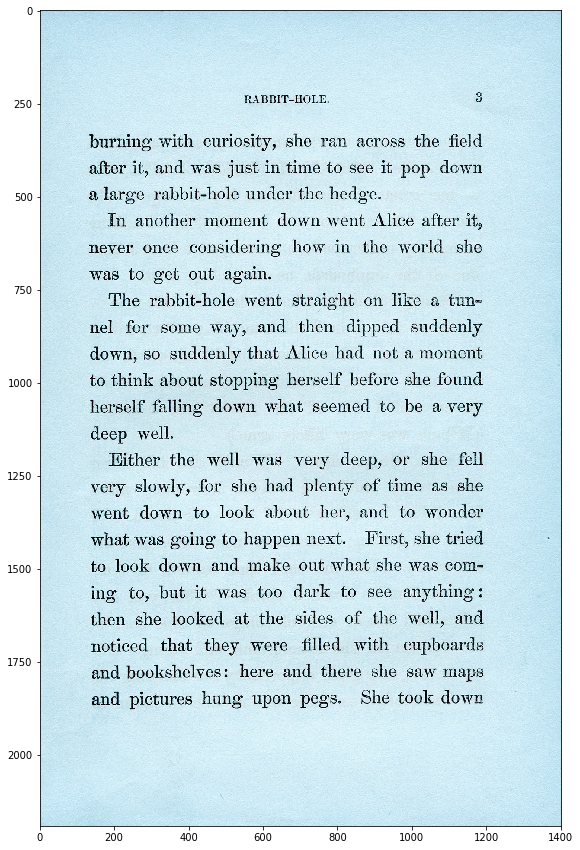

In [11]:
plt.subplots(figsize = (20,15))
plt.imshow(image, cmap = "gray")

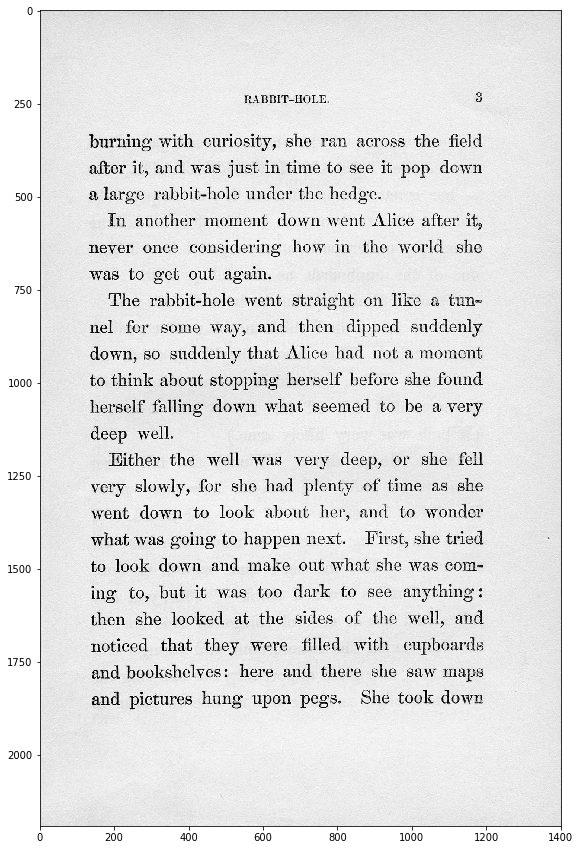

In [12]:
plt.subplots(figsize = (20,15))
plt.imshow(gray , cmap = "gray")

In [13]:
cv2.imwrite("demo-gray.jpg", gray)

True

# Code Starts from here

In [14]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [15]:
image = cv2.imread("demo-image.jpg")

In [16]:
converted_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
converted_image = cv2.adaptiveThreshold(converted_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,4)
converted_image = cv2.medianBlur(converted_image, 3)

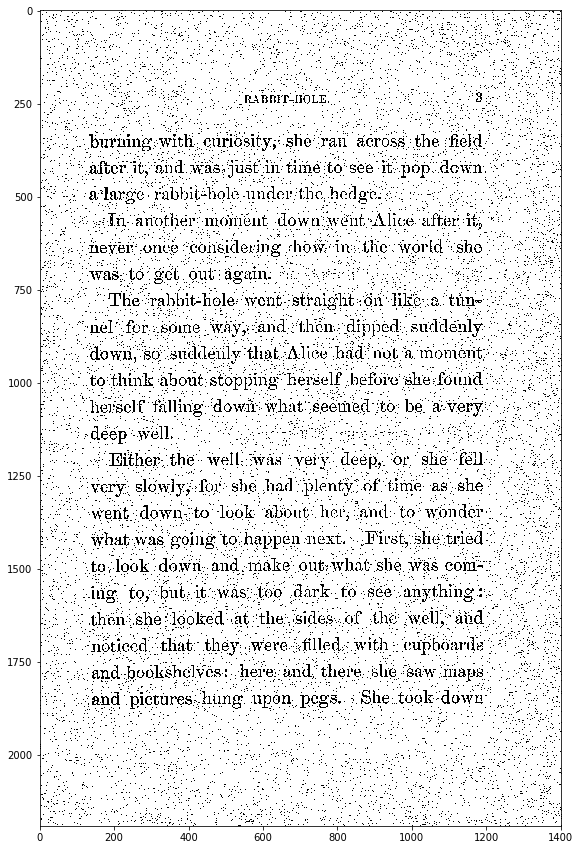

In [17]:
plt.subplots(figsize = (20,15))
plt.imshow(converted_image, cmap = "gray")

In [19]:
contours,_ = cv2.findContours(converted_image, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [20]:
len(contours)

30424

In [21]:
contours[0]

array([[[1402, 2191]]], dtype=int32)

In [22]:
contours[1]

array([[[ 0,  0]],

       [[ 0, 55]],

       [[ 1, 56]],

       ...,

       [[ 7,  3]],

       [[ 6,  2]],

       [[ 8,  0]]], dtype=int32)

In [23]:
contours[1].shape

(1332, 1, 2)

In [24]:
os.mkdir("./characters")

In [26]:
for i in range(len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    if w * h > 600 and w*h < 20000:
        region_of_interest = gray[y:y+h, x:x+w]
        cv2.imwrite("./characters/" + "charater_" + str(i) + ".jpg", region_of_interest)